# montiFEM

Im Folgenden soll die Durchbiegung der neutralen Faser eines Euler-Bernoulli-Balkens mit hilfe der Methode der Finiten Elemente modelliert werden. Ausgehend von der Differentialgleichung der Biegelinie 4. Ordnung wird unter Anwendung des Ritz'schen Verfahrens ein lineares Gleichungssystem aufgestellt, welches die Eigenschaften des Balkens beschreibt:

$$ EJ w_{}^{IV}(x) = q(x) \;\; \longrightarrow \;\;  \text{FEM-Analyse}  \;\; \longrightarrow \;\; \underline{\underline{K}} \; \underline{U} = \underline{F} $$ 

Unter Verwendung passender Ansatzfunktionen $h_i(x)$ kann dann mithilfe des Lösungsvektors $ \underline{U} = (u_0, u_1,.. u_i, .. u_n)^\top $ in jedem "finiten Element" eine kontinuierliche Näheungslösung angegeben werden: 

$$ w(x)\approx \sum_{i=1}^{e} u_i h_i(x) $$

$$ \int_{0}^{l} EJ w_{}^{IV}(x) \nu(x) dx = \int_{0}^{l} q(x) \nu(x) dx $$

Offensichtlich ist die Ordnung der Operatotgleichung gleich 4. Daraus folgt, dass die Integrale Form zwei mal partiell integriert werden muss um die natürlichen (Neumann) Randbedingungen zu berücksichtigen: 

$$ EJ w_{}^{'''}(x) \nu(x) \big|_0^l - \int_{0}^{l} EJ w_{}^{'''}(x) \nu_{}^{'}(x) dx = \int_{0}^{l} q(x) \nu(x) dx $$

$$ - EJ w_{}^{''}(x) \nu_{}^{'}(x) \big|_0^l + \int_{0}^{l} EJ w_{}^{''}(x) \nu_{}^{''}(x) dx = \int_{0}^{l} q(x) \nu(x) dx $$

Nach substituion der Näherungslösung und $ \nu = h $ (beliebig) erhält man das folgende Gleichungssystem: 

$$ \sum_{i=1}^{e} u_i \int_{0}^{l} EJ h_{i}^{''}(x) h_{j}^{''}(x) dx = \int_{0}^{l} q(x) h_{j}(x) dx $$

Oder in Matrixschreibweise: 

$$ \underline{\underline{k}}_{}^{(e)}  \underline{u}_{}^{(e)} = \underline{f}_{}^{(e)} $$

wobei, 

$$ \underline{\underline{k}}_{}^{(e)} = \int_{0}^{l} EJ h_{i}^{''}(x) h_{j}^{''}(x) dx $$ 
$$ \underline{f}_{}^{(e)} = \int_{0}^{l} q(x) h_{j}(x) dx $$

Um Elementsteifigkeitsmatrix und Elementlastvektor explizit anzugeben müssen zuerst geeignete Ansatzfunktionen gewählt werden. Da in jedem Element vier essentielle (Dirichlet) Randbedingungen gefordert werden $(w_{}^{}(0),w_{}^{'}(0),w_{}^{}(l),w_{}^{'}(l))$ ist der minimale Polynomgrad drei: 

$$ w_{}^{(e)}(\xi) = \alpha_0 + \alpha_1 \xi + \alpha_2 \xi^2 + \alpha_3 \xi^3 $$

Die vier $\alpha$-Parameter können also so gewählt werden, dass das Polynom am Anfang und am Ende des finiten Elements beliebige Werte und Steigungen annimmt. Um diese Randbedingungen im Rahmen der linearen Algebra "steuern" zu können entscheiden wir uns für "Hermite Cubic Interpolation Functions":

$$ h_0^{(e)}(\xi) = 1 - 3 \left(\frac{\xi}{l}\right)^2 + 2 \left( \frac{\xi}{l} \right)^3 $$ 
$$ h_1^{(e)}(\xi) = - \xi \left( 1 - \left( \frac{\xi}{l} \right) \right)^2 $$ 
$$ h_2^{(e)}(\xi) =  3 \left(\frac{\xi}{l}\right)^2 - 2 \left( \frac{\xi}{l} \right)^3 $$ 
$$ h_3^{(e)}(\xi) = - \xi \left( \left( \frac{\xi}{l} \right)^2 - \left( \frac{\xi}{l} \right)\right) $$ 




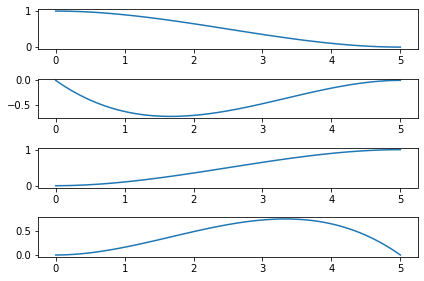

In [46]:
import matplotlib.pyplot as plt  
from numpy import linspace 

l = 5 # länge des elements 
x = linspace(0,l,100) # xi-werte


# hermite cubic interpolation functions 

def h0(x,l):
    return 1 - 3 * (x/l)**2 + 2 * (x/l)**3

def h1(x,l):
    return - x * (1 - (x/l))**2

def h2(x,l):
    return 3 * (x/l)**2 - 2 * (x/l)**3

def h3(x,l):
    return - x * ((x/l)**2 -(x/l))

plt.subplot(411)
plt.plot(x, h0(x,l))

plt.subplot(412)
plt.plot(x, h1(x,l))

plt.subplot(413)
plt.plot(x, h2(x,l))

plt.subplot(414)
plt.plot(x, h3(x,l))

plt.tight_layout() 
plt.show()

Da jede der vier Ansatzfunktionen für eine der essentielen Randbedingungen "zuständig" ist kann man nun für beliebige vorgegebene Randwerte Polynome dritten grades finden indem man die Ansatzfunktionen entsprechend skaliert und überlagert. Im nachfolgenden Python 3 Skript kann das ausprobiert werden:

(-0.25, 5.25, -0.2333333333333333, 0.011111111111111112)

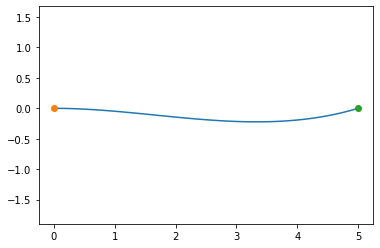

In [47]:
# gib hier Randwerte für das polynom vor: 
RB0 = 0.0  # w(0) 
RB1 = 0.0  # w'(0)
RB2 = 0.0  # w(l)
RB3 = -0.3 # w'(l)


def w(x):
    return  h0(x,l)*RB0 + h1(x,l)*RB1 + h2(x,l)*RB2 + h3(x,l)*RB3

plt.plot(x, w(x),0,w(0),'o',l,w(l),'o')
plt.axis('equal')

Nachdem nun die Ansatzfunktionen festgelegt wurden müssen noch ihre Ableitungen, sofern diese für die berechnung der ESM notwendig sind, bestimmt werden. In diesem Beispiel braucht man die zweiten Ableitungen der Ansatzfunktionen. Üblicherweise erfolgen Integration und differenzierung numerisch (zB Gauss-Quadratur). Zum besseren Verständnis des Verfahrens werden wir hier aber unter Verwendung der toolbox "sympy" die Ansatzfunktionen weiterhin analytisch behandeln:

In [48]:
from sympy import symbols, diff, zeros
from numpy import array, asarray

# definiere symbolische variable x und parameter l
x, l = symbols('x l')

# zusammenfassen der symbolischen ansatzfunktionen in einem array
h = array([[h0(x,l)],[h1(x,l)],[h2(x,l)],[h3(x,l)]])

# für die berechnung der ESM benötigen wir h''(x)
# initialisiere sympy-array mit 2. ableitung der ansatzfunktionen
h2 = zeros(4,1) 

# symbolische berechnung der 2. ableitung
for i in range(4): 
    # 2. ableitung für alle 4 ansatzfunktionen
    h2[i,0] = diff(h[i,0],x,x) 
    
# konvertieren zu numpy array    
h2 = asarray(h2) 
    
print("Ansatzfunktionen:")    
print("h_i =",h )  
print("         ")
print("2. Ableitungen der Ansatzfunktionen:")    
print("h´´_i =",h2)

Ansatzfunktionen:
h_i = [[1 - 3*x**2/l**2 + 2*x**3/l**3]
 [-x*(1 - x/l)**2]
 [3*x**2/l**2 - 2*x**3/l**3]
 [-x*(-x/l + x**2/l**2)]]
         
2. Ableitungen der Ansatzfunktionen:
h´´_i = [[6*(-1 + 2*x/l)/l**2]
 [2*(2 - 3*x/l)/l]
 [6*(1 - 2*x/l)/l**2]
 [2*(1 - 3*x/l)/l]]


In [52]:
from sympy import integrate, simplify

# definiere symbolische parameter
E, J = symbols('E J')

# initialisiere ESM 
k = zeros(4) 

# berechne ESM durch analytische integration
for i in range(4): 
    for j in range(4): 
        k[i,j] = integrate(E*J*h2[i,0]*h2[j,0], (x, 0, l))

# vereinfachen        
k = simplify(k) 

# konvertieren zu numpy array    
k = asarray(k)        

print("Elementsteifigkeitsmatrix:")
print("k_ij =",k)        
        

Elementsteifigkeitsmatrix:
k_ij = [[12*E*J/l**3 -6*E*J/l**2 -12*E*J/l**3 -6*E*J/l**2]
 [-6*E*J/l**2 4*E*J/l 6*E*J/l**2 2*E*J/l]
 [-12*E*J/l**3 6*E*J/l**2 12*E*J/l**3 6*E*J/l**2]
 [-6*E*J/l**2 2*E*J/l 6*E*J/l**2 4*E*J/l]]
